In [1]:
# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['figure.figsize'] = (5.0, 3.0)
#mpl.rcParams['image.cmap'] = 'jet'
%load_ext autoreload
%autoreload 2

# general
import numpy as np
import time, sys

# slide stuff
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/rgast/anaconda3/envs/mne_presentation/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "simple",
              "transition": "zoom",
              "start_slideshow_at": "selected"
})

# analysis
import mne

<center>Biosignale 2018, 22.03.18
----------------------------------

<br></br>
<img src="img/PyRates_logo.png" alt="logo" width=250 style="margin: 20px 30px" ALIGN="left" >

<font color="red">PyRates - A Python Framework for Rate-Based Neural Simulations</font>
====================================

<br></br>
<br></br>


*<center>Developed by Richard Gast & Daniel Rose within the MEG and Cortical Networks group and the Neurophysics department at the MPI CBS Leipzig*

<center>Overview
----------------

**<font color="red">1. Introduction to Neural Mass Modeling (NMM)**
    - Relevance for neuroscientific research
    - Basic formalism
**<font color="red">2. PyRates**
    - Framework structure
    - Building NMMs in PyRates
**<font color="red">3. Example Simulations: The Jansen-Rit NMM**
    - Bifurcations of the Jansen-Rit model
    - SPectral responses of the Jansen-Rit model

<img src="img/PyRates_logo.png" width=250 style="float:right; margin: 20px 30px">
<font color="red">1. Introduction
---------------------------------

<img src="img/David_EEGsignal_origin.png",width=600,height=400, ALIGN="right">

<font color="red">What do we need computational modeling in neuroscience for?
-----------------------------------------------------------------------------

* <font size=5>EEG/MEG signals mainly result from extracellular current flow

* <font size=5>They arise from large numbers of synchronously de- or hyperpolarized cells aligned in parallel

* <font size=5>A substantial amount of the brain's state variables cannot be observed non-invasively

<font color="red">Neural Mass Models: Computational Models of neural population dynamics
----------------------------------------------------------------------------------------


* <font size=5>biophysically motivated: They model average membrane potentials & firing rates of large cell populations

* <font size=5>Computationally feasible: They lump large cell numbers into a single state equation

* <font size=5>Can be compared with & informed by electrophysiological and MRI data

<font color="red">Neural Mass Models: Basic Formalism
-----------------------------------------------------

* <font size=5>Average membrane potential given by rate-to-potential operator (RTPO):</font>
    
    - <font size=5 color="b30000">Explicit leaky capacitor (LC): <font size=6 color="Black"> $\dot{v(t)} = \frac{I_{syn} + I_{leak}}{C}$</font>
    - <font size=5>Implicit LC: <font size=6 color="Black">$v(t) = \int_{t' = -\infty}^{t} h_{e/i}(t - t') \times p(t') dt'$</font>
    
    - <font size=5>with a synaptic kernel typically given by: <font size=6 color="Black">$h_{e/i}(t) = \frac{H_{e/i} t \exp(\frac{-t}{\tau_{e/i}})}{\tau_{e/i}}$</font>

* <font size=5>Average firing rate given by potential-to-rate operator (PTRO).</font> 
    
    - <font size=5 color="#b30000">Often, a sigmoidal form is used: <font size=6 color="Black">$p(t) = \frac{2e_0}{1 + \exp(r(v_0 - v(t)))}$

<font color="red">Neural Mass Models: The Jansen-Rit Model
----------------------------------------------------------

<img src="img/JRC_structure.png" width=1000 ALIGN="left" style="margin: 70px 100px">

<img src="img/PyRates_logo.png" width=350 style="float:right; margin: 20px 30px">
<font color="red">2. PyRates
-----------------------------

<font color="red">2. PyRates
----------------------------

<img src="img/PyRates_structure.png" width=600 style="float:right; margin:10px 20px">

<br></br>
<br></br>
Organized into 4 modules: 
* Axon
* Synapse
* Population 
* Circuit


<font color="red">Creating custom neural masses in PyRates
----------------------------------------------------------
<font size=6>Axon module: No restrictions on functional form of potential-to-rate transform

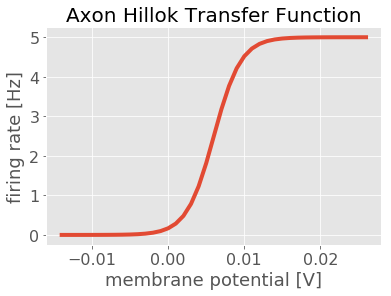

In [23]:
from core.axon import Axon, SigmoidAxon, JansenRitAxon

axon = JansenRitAxon()
#axon = SigmoidAxon(max_firing_rate=1., membrane_potential_threshold=0., sigmoid_steepness=100.)
ax = axon.plot_transfer_function(create_plot=False)

<font color="red">Creating custom neural masses in PyRates
----------------------------------------------
<font size=6>Synapse module: Kernel convolutions of any functional form

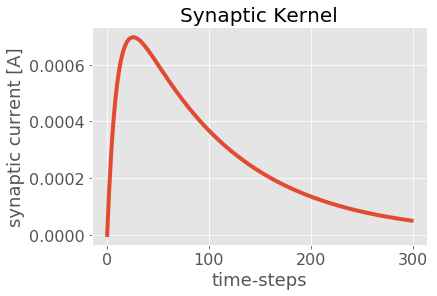

In [32]:
from core.synapse import Synapse, DoubleExponentialSynapse, GABAACurrentSynapse

synapse = DoubleExponentialSynapse(efficacy=1e-3, tau_rise=0.01, tau_decay=0.1, bin_size=0.001, max_delay=0.3)
p = synapse.plot_synaptic_kernel(create_plot=False)

<font color="red">Creating custom neural masses in PyRates
----------------------------------------------------------
<font size=5>Population module: Dynamic, automated choice of underlying equations solved during state updates 

In [34]:
from core.population import Population

population = Population(step_size=1e-3,
                        synapses=['JansenRitExcitatorySynapse', 'JansenRitInhibitorySynapse'], 
                        axon='JansenRitAxon', synapse_class='ExponentialSynapse')

print('Leaky capacitor formalism is used:          ', population.leaky_capacitor)
print('Synaptic kernels are evaluated numerically: ', population.integro_differential)
print('Plasticity mechanisms are enabled:          ', population.synaptic_plasticity or population.axonal_plasticity)

Leaky capacitor formalism is used:           False
Synaptic kernels are evaluated numerically:  False
Plasticity mechanisms are enabled:           False


<font color="red">Setting up NMMs in PyRates
--------------------------------------------
<font size=5>Circuit module: Multiple ways to construct networks of populations

* From available templates

In [35]:
from core.circuit import JansenRitCircuit

jrc1 = JansenRitCircuit(step_size=1e-3)

<font color="red">Setting up NMMs in PyRates
--------------------------------------------
<font size=5>Circuit module: Multiple ways to construct networks of populations

* From population objects/types and connectivity information

In [36]:
from core.circuit import CircuitFromPopulations

populations = ['JansenRitPyramidalCells', 'JansenRitInterneurons', 'JansenRitInterneurons']
jrc2 = CircuitFromPopulations(population_types=populations, connectivity=jrc1.C, step_size=1e-3, tau_leak=None)

<font color="red">Setting up NMMs in PyRates
--------------------------------------------
<font size=5>Circuit module: Multiple ways to construct networks of populations

* From synapse/axon features and connectivity information

In [38]:
from core.circuit import CircuitFromScratch

synapses = ['JansenRitExcitatorySynapse', 'JansenRitInhibitorySynapse']
axons = ['JansenRitAxon', 'JansenRitAxon', 'JansenRitAxon']
jrc3 = CircuitFromScratch(synapses=synapses, axons=axons, connectivity=jrc1.C, step_size=1e-3, synapse_class='ExponentialSynapse')

<font color="red">Setting up NMMs in PyRates
--------------------------------------------
<font size=5>Circuit module: Multiple ways to construct networks of populations

* From a set of existing circuits

In [39]:
from core.circuit import CircuitFromCircuit

jrc4 = CircuitFromCircuit([jrc1, jrc2], connection_strengths=[100.], source_populations=[0], target_populations=[3], target_synapses=[0])

<font color="red">Setting up NMMs in PyRates
--------------------------------------------
<font size=5>Circuit module: Multiple ways to construct networks of populations

* From a stored circuit configuration file

In [41]:
from core.utility.construct import construct_circuit_from_file

jrc5 = construct_circuit_from_file('../tests/resources/test_4_1_JR_alpha.json')

<img src="img/PyRates_logo.png" width=250 style="float:right; margin: 20px 30px">
<font color="red">3. Example Simulations: <br><br/>The Jansen-Rit NMM
------------------------------------------------------------

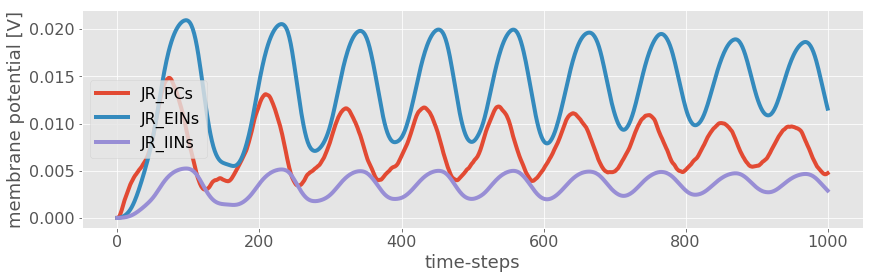

In [17]:
from core.circuit import JansenRitCircuit

step_size=1e-3
#synapse_params = [{'tau': 3e-3, 'efficacy': 3.25e-3 * (10e-3 / 3e-3)}, {'tau': 3e-3, 'efficacy': -22e-3 * (20e-3 / 3e-3)}]
circuit = JansenRitCircuit(step_size=step_size, connectivity_scaling=135., synapse_params=None)

simulation_time = 1.
synaptic_input = np.zeros((int(simulation_time / step_size), 3, 2))
synaptic_input[:, 0, 0] = np.random.uniform(120, 320, int(simulation_time / step_size))

circuit.run(synaptic_input, simulation_time)
fig, axes = plt.subplots(figsize=(14, 4))
axes = circuit.plot_population_states(create_plot=False, axes=axes)

<font color="red">4. Conclusion
-------------------------------

<center><font color="red">Thank you!
====================================

<center><img src="img/PyRates_logo.png" width=300>